<img src="https://www.reliance-project.eu/wp-content/uploads/2021/03/Asset-8mdpi.svg" width="250" align="left">
<img src="https://www.sharper-night.it/wp-content/uploads/event-manager-uploads/organizer_logo/2022/09/ISMAR_Logo_11960_DOC_IT.jpg" width="200" align="right">

# Estimating the amount of sunlight reaching the seabed from satellite data

In [6]:
import matplotlib
import matplotlib.pyplot as pyplot
from osgeo import gdal
import numpy as np
import warnings

# Import satellite data

In [2]:
par_18 = gdal.Open("NASA_2002_2018_avg_par.tif")
par_18_band = par_18.GetRasterBand(1)
par_18_array = par_18_band.ReadAsArray()

kd490_18 = gdal.Open('NASA_avg_2002-2017_kd490.tif')
kd490_18_band = kd490_18.GetRasterBand(1)
kd490_18_array = kd490_18_band.ReadAsArray()

bathy_med = gdal.Open('EMODnet_bathymetry_rev.tif')
bathy_med_band = bathy_med.GetRasterBand(1)
bathy_med_array = bathy_med_band.ReadAsArray()

# Set null data

In [ ]:
par_18_array[par_18_array<0]=np.nan
kd490_18_array[kd490_18_array<0]=np.nan
bathy_med_array[bathy_med_array<0]=np.nan

# Plot the data

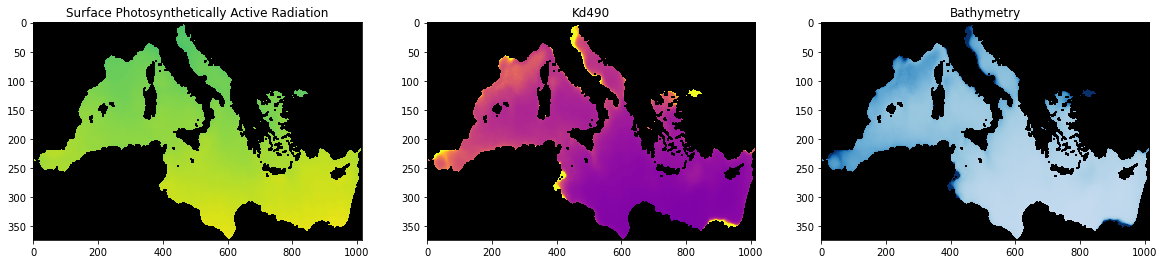

In [214]:
pyplot.figure(figsize=(20,4))
pyplot.subplot(1,3,1)
cmap1 = plt.cm.get_cmap("viridis").copy()
cmap1.set_bad(color='black')
pyplot.imshow(par_18_array, vmin=0, vmax=43, cmap=cmap1, aspect='auto')
plt.title("Surface Photosynthetically Active Radiation")
pyplot.subplot(1,3,2)
cmap2 = plt.cm.get_cmap("plasma").copy()
cmap2.set_bad(color='black')
pyplot.imshow(kd490_18_array, vmin=0, vmax=0.1, cmap=cmap2, aspect='auto')
plt.title("Kd490")
pyplot.subplot(1,3,3)
cmap3 = plt.cm.get_cmap("Blues").copy()
cmap3.set_bad(color='black')
pyplot.imshow(kd490_18_array, vmin=0, vmax=0.1, cmap=cmap3, aspect='auto')
plt.title("Bathymetry")
pyplot.show()

# Estimate light reaching the seabed

In [215]:
warnings.filterwarnings('ignore')
kdpar_array= 0.0665+(0.874 * kd490_18_array)-(0.00121 * (kd490_18_array**-1))
exp=np.multiply(-kdpar_array,bathy_med_array)
PAR_seabed_array = np.multiply(par_18_array,np.exp(exp))

# Plot the results

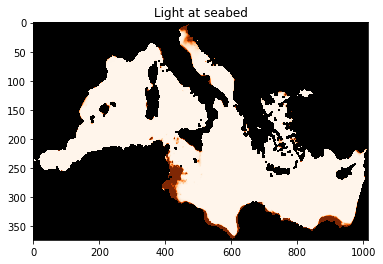

In [224]:
cmap = plt.cm.get_cmap("Oranges").copy()
cmap.set_bad(color='black')
pyplot.imshow(PAR_seabed_array, vmin=0, vmax=0.5, cmap=cmap, aspect='auto')
plt.title("Light at seabed")
pyplot.show()

# Export results as GeoTiff

In [71]:
driver=gdal.GetDriverByName("GTiff")
driver.Register()
outds=driver.Create("PAR_seabed3.tif", xsize=PAR_seabed_array.shape[1], ysize=PAR_seabed_array.shape[0], bands=1,eType= gdal.GDT_Float32)
proj=par_18.GetProjection()
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outds.GetRasterBand(1).WriteArray(PAR_seabed_array)
outds.FlushCache()
outds = None